In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
from scipy.special import gamma

sns.set_style('whitegrid')

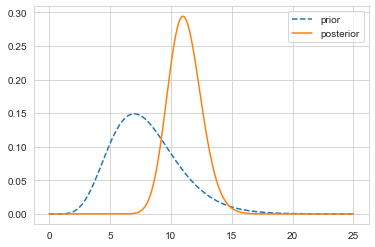

In [107]:
xs = np.linspace(0, 25, 1000)
prior = ss.gamma(a=8, scale=1/1)
post = ss.gamma(a=67, scale=1/6)

plt.plot(xs, prior.pdf(xs), label='prior', linestyle='--')
plt.plot(xs, post.pdf(xs), label='posterior')
plt.legend()

In [115]:
def beta_bernoulli(x, a, b):
    return gamma(a+b)/gamma(a+b+1) * gamma(a+x)/gamma(a) * gamma(b+1-x)/gamma(b)

In [117]:
beta_bernoulli(1, 5, 9)

0.35714285714285715

0.9039698786381929


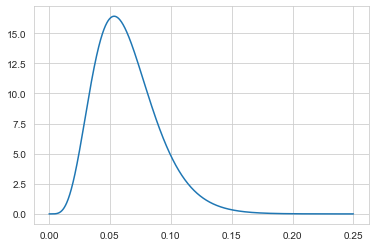

In [146]:
xs = np.linspace(0, 0.25, 1000)
rv = ss.gamma(a=6, scale=1/93.5)
print(rv.cdf(0.1))

plt.plot(xs, rv.pdf(xs))

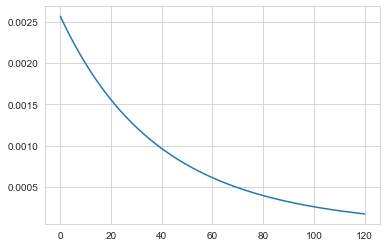

In [139]:
a, b = 9, 390
xs = np.linspace(0, 120, 1000)
ys = (b**a)/((b+xs)**(a+1))

plt.plot(xs, ys)

In [149]:
ss.norm(loc=96.17, scale=0.042).cdf(100)

1.0

In [169]:
ss.invgamma(a=3, scale=200).mean()

100.0

In [246]:
ss.norm(loc=96.17, scale=np.sqrt(0.042)).interval(0.95)

(95.76832691094728, 96.57167308905272)

In [238]:
post_sig_B = ss.invgamma(a=16.5, scale=6022.9)
rvs_sig_B = post_sig_B.rvs(size=10000)
post_mu_B = ss.norm(loc=609.3, scale=np.sqrt(rvs_sig_B/27.1))
rvs_mu_B = post_mu_B.rvs()

In [239]:
np.c_[post_mu_B.interval(0.95)].mean(axis=0)

array([601.9286124, 616.6713876])

In [241]:
post_sig_A = ss.invgamma(a=18, scale=6796.4)
rvs_sig_A = post_sig_A.rvs(size=10000)
post_mu_A = ss.norm(loc=622.4, scale=np.sqrt(rvs_sig_A/30.1))
rvs_mu_A = post_mu_A.rvs()

In [242]:
np.mean(rvs_mu_A > rvs_mu_B)

0.9933

<AxesSubplot:ylabel='Density'>

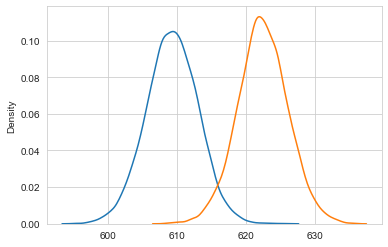

In [252]:
sns.kdeplot(rvs_mu_B)
sns.kdeplot(rvs_mu_A)

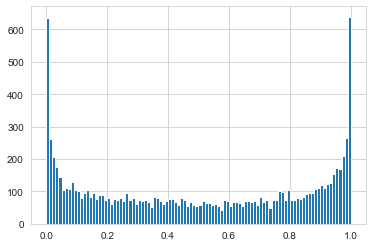

In [257]:
_ = plt.hist(ss.beta(1/2, 1/2).rvs(10000), bins=100)

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [46]:
golfer = pd.read_csv('pgalpga2008.dat', sep='\s+', names=['distance', 'pct_acc', 'gender'])
golfer['gender'] = golfer.gender.apply(lambda x: 'Female' if x==1 else 'Male')

In [47]:
golfer.sample(10)

,distance,pct_acc,gender
57,268.0,60.9,Female
158,302.1,54.7,Male
15,235.3,75.5,Female
342,287.7,63.4,Male
49,242.6,64.7,Female
98,238.1,71.7,Female
83,224.8,72.6,Female
59,246.1,72.8,Female
137,240.8,71.5,Female
205,294.2,52.8,Male


<AxesSubplot:xlabel='distance', ylabel='pct_acc'>

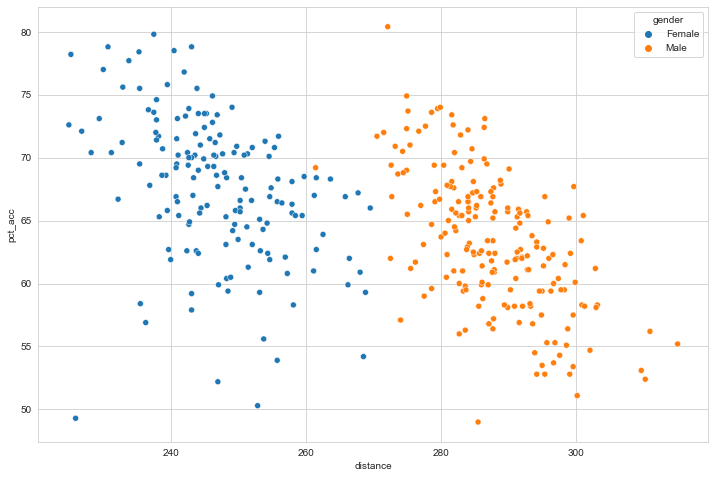

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='distance', y='pct_acc', hue='gender', data=golfer, palette='tab10')

## on whole dataset

In [186]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

golfer = pd.read_csv('pgalpga2008.dat', sep='\s+', names=['distance', 'pct_acc', 'gender'])
golfer['gender'] = golfer.gender.apply(lambda x: 0 if x==1 else 1)
X = sm.add_constant(golfer[['distance', 'gender']])
y = golfer[['pct_acc']]

mod = sm.OLS(y, X).fit()
mod.summary()

C:\Users\ztang\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pct_acc   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     98.24
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.31e-34
Time:                        00:55:58   Log-Likelihood:                -1055.9
No. Observations:                 354   AIC:                             2118.
Df Residuals:                     351   BIC:                             2129.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.2689      7.035     20.934      0.000     133.433     161.105
distance      -0.3228      0.028    -11.343      0.000      -0.379      -0.267
gender         8.9489      1.270      7.047      0.000       6.451      11.446
==============================================================================
Omnibus:                       51.119   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.755
Skew:                          -0.795   Prob(JB):                     3.59e-22
Kurtosis:                       5.042   Cond. No.                     7.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

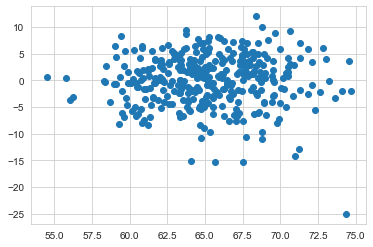

In [189]:
plt.scatter(mod.predict(X), mod.resid)

## only on female golfer

In [62]:
import statsmodels.api as sm

fgolfer = golfer[golfer.gender=='Female']
X = sm.add_constant(fgolfer[['distance']], prepend=True)
y = fgolfer[['pct_acc']]

mod = sm.OLS(y, X).fit()
mod.summary()

C:\Users\ztang\miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pct_acc   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     33.61
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           3.66e-08
Time:                        00:04:37   Log-Likelihood:                -482.00
No. Observations:                 157   AIC:                             968.0
Df Residuals:                     155   BIC:                             974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        130.8933     10.928     11.978      0.000     109.307     152.480
distance      -0.2565      0.044     -5.797      0.000      -0.344      -0.169
==============================================================================
Omnibus:                       38.145   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.558
Skew:                          -1.122   Prob(JB):                     1.75e-16
Kurtosis:                       5.462   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
mod.predict(np.array([1, 260]))

array([64.20573229])

In [155]:
# posterior prediction distribution @ x, 95% interval
n = fgolfer.shape[0]
dis_mu = fgolfer.distance.mean()
dis_var = fgolfer.distance.var(ddof=1)

x = 260
y_hat = mod.predict([1, x])[0]

mu = y_hat
scale =  np.sqrt(mod.mse_resid) * np.sqrt(1+1/n+(x-dis_mu)**2/((n-1)*dis_var))
rv = ss.t(df=n-2, loc=mu, scale=scale)
rv.interval(0.95)

(53.74527661085075, 74.66618796430787)

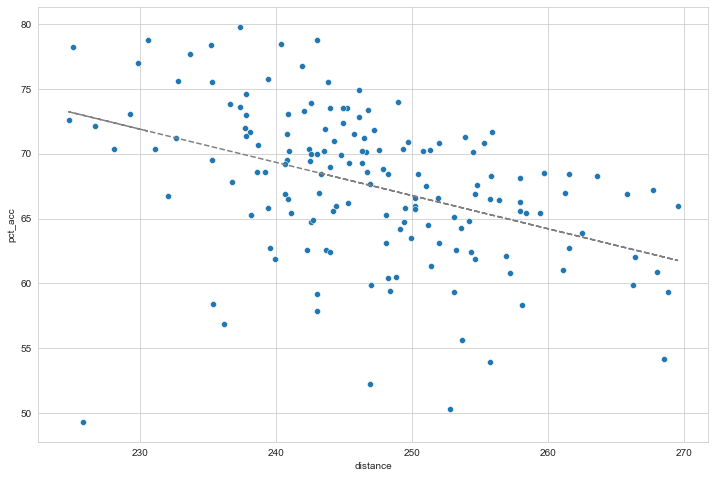

In [77]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='distance', y='pct_acc', data=fgolfer)
plt.plot(X.distance, (mod.params * X).sum(1), color='grey', linestyle='--')